In [1]:
from pycesam import *
from pycesam.gui import *
import astropy.units as u
from astropy.constants import R_jup, R_sun, mu0, M_sun, G
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
from ipywidgets import interact

In [2]:
mdl = CModel('1MJ_R')
mdl_plot = CModelGUI('1MJ_R')

Reading 1MJ_R.don...[Done]
Reading 1MJ_R.run...[Done]
Reading 1MJ_R.frun...[Done]


Reading *1MJ_R*.osc files:   0%|          | 0/131 [00:00<?, ?it/s]

Reading 1MJ_R.HRnew...[Done]
Reading 1MJ_R.don...[Done]
Reading 1MJ_R.run...[Done]
Reading 1MJ_R.frun...[Done]


/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:1226: RuntimeWarning: divide by zero encountered in log10
  self.FeH  = np.log10(self.z/x) - np.log10(zsx_sol)
/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:1226: RuntimeWarning: invalid value encountered in log10
  self.FeH  = np.log10(self.z/x) - np.log10(zsx_sol)


Reading *1MJ_R*.osc files:   0%|          | 0/131 [00:00<?, ?it/s]

Reading 1MJ_R.HRnew...[Done]


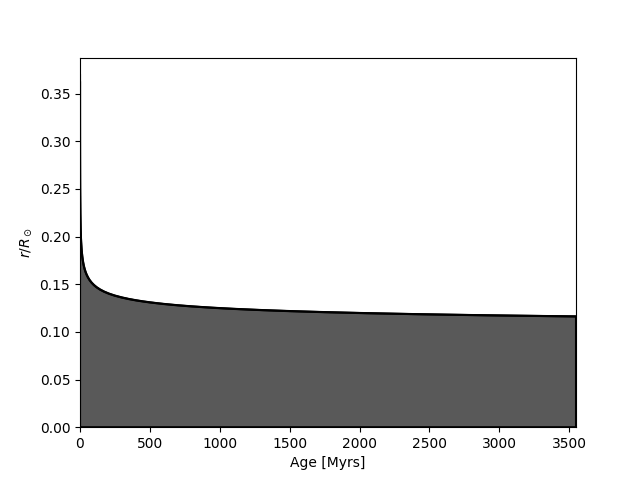

In [3]:
mdl_plot.plot_cz(r_or_m='r')
plt.show()

In [4]:
end = len(mdl.glob)-1
Omega = mdl.params.w_rot*1e3
R_tot = mdl.var[end][0][0]/1e2
print(f"total radius of planet = {R_tot/(R_jup.value)} Rjup")
print(f"total mass of planet = {mdl.params.mtot} Msun")
print(f"total angular velocity of planet = {Omega/1e3} km/s")

total radius of planet = 1.1282561394168578 Rjup
total mass of planet = 0.001 Msun
total angular velocity of planet = 4.0 km/s


In [67]:
print(1.13*R_jup.value*1e2)

8078595999.999998


In [5]:
print(R_tot)

80661287.91918999


In [ ]:
Omega_array = mdl.var[end][15] # rad/s
r = mdl.var[end][0]
print(r*Omega_array/1e5) # km/s

[7.74186368 7.739318   7.73864324 7.73814572 7.73771754 7.737323
 7.73694645 7.73658026 7.73622072 7.73586625 7.73551651 7.73517191
 7.7348333  7.73450172 7.73417837 7.73386443 7.7335611  7.73326961
 7.7329913  7.73272776 7.73248102 7.73225367 7.73204892 7.73187066
 7.73172322 7.73161118 7.7315189  7.73142771 7.73133763 7.73124863
 7.73116072 7.73107391 7.73098819 7.73090358 7.73082008 7.73073769
 7.73065642 7.73057629 7.7304973  7.73041946 7.73034277 7.73026723
 7.73019286 7.73011963 7.73004757 7.72997665 7.72990687 7.72983824
 7.72977077 7.72970443 7.72963923 7.72957513 7.72951213 7.72945018
 7.72938926 7.72932934 7.72927037 7.72921232 7.72915514 7.72909878
 7.7290432  7.72898833 7.72893412 7.72888052 7.72882746 7.72877487
 7.7287227  7.72867086 7.72861929 7.72856791 7.72851665 7.72846542
 7.72841415 7.72836276 7.72831114 7.72825923 7.72820693 7.72815415
 7.72810078 7.72804674 7.72799192 7.72793622 7.72787954 7.72782177
 7.7277628  7.72770251 7.7276408  7.72757754 7.72751261 7.727445

In [7]:
len(Omega_array)

433

/home/localuser/Desktop/M2/Gas_Dynamics/Project/cesam2k20/python3/pycesam/__init__.py:3979: RuntimeWarning: invalid value encountered in divide
  self.Frad = krad*te*grad/hp


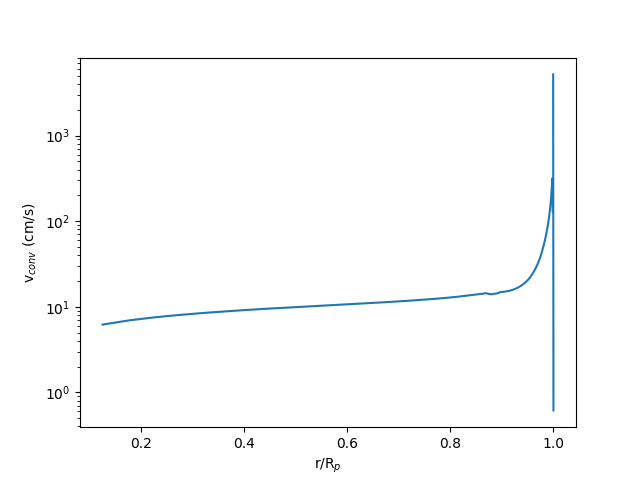

In [8]:
mdl.calc_vconv('osc', i=end)

r = ((mdl.var[end][0])/(R_tot*1e2))
  
plt.figure()
plt.plot(r, mdl.vconv)
    
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'v$_{conv}$ (cm/s)')
plt.yscale('log')
plt.show()

In [9]:
mask = np.where(~np.isnan(mdl.vconv))

In [10]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Ro_over_time(i=end):
    
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    mdl.calc_vconv('osc', i=i)
    Ro = mdl.vconv/(mdl.lmix*mdl.var[i][15]) #vconv/lmix * Omega
        
        
    age = mdl.glob[i][10]
    plt.figure()
    #print(len(r),len(Ro),len(mdl.vconv),len(mdl.lmix))
    plt.plot(r, Ro)
    plt.plot(r, 0.12*np.ones(len(Ro)), label=r'critical R$_o$')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'Ro')
    plt.yscale('log')
    plt.title(f'At t = {age/1e3} Gyr')
    plt.show()

interactive(children=(IntSlider(value=130, description='i', max=130), Output()), _dom_classes=('widget-interac…

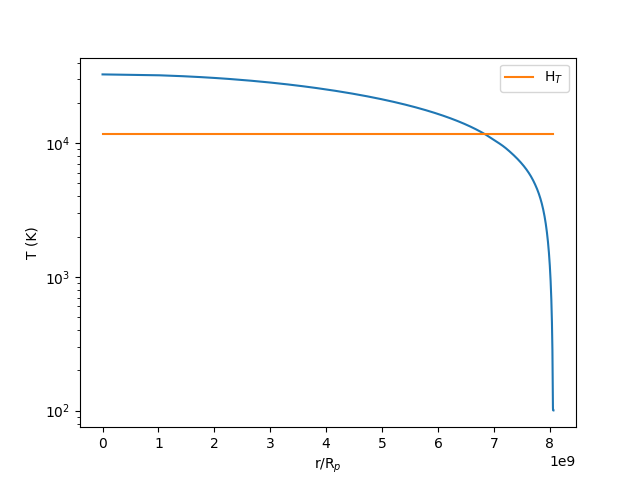

[6.83055417e+09]


In [64]:
T = mdl.var[end][2]
index = np.where(np.abs(T - T[-1]/2.78) < 100)
plt.figure()
plt.plot(r, T)
plt.plot(r, (T[-1]/2.78)*np.ones(len(r)), label=r'H$_T$')
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'T (K)')
plt.yscale('log')
plt.legend()
plt.show()

H_T_obs = r[index]#*R_tot#*1e2
print(H_T_obs)

In [12]:
@interact(i=(0, len(mdl.var), 1)) 
def plot_pressure_over_time(i=end):
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    age = mdl.glob[i][10]
    plt.figure()
    plt.plot(r, mdl.var[i][3]*1e-12)
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'P (Mbar)')
    plt.yscale('log')
    plt.title(f'At t = {age/1e3} Gyr')
    plt.show()

interactive(children=(IntSlider(value=130, description='i', max=131), Output()), _dom_classes=('widget-interac…

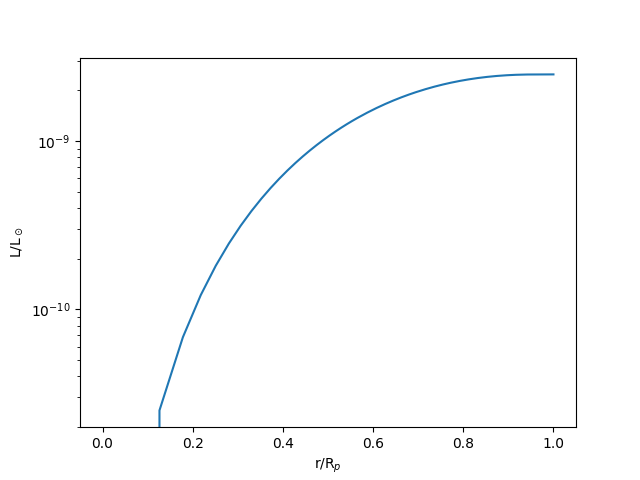

In [13]:
L = mdl.var[end][6]
L_sun = mdl.glob[end][16]

plt.figure()
plt.plot(r, L/L_sun)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'L/L$_\odot$')
plt.yscale('log')
plt.show()

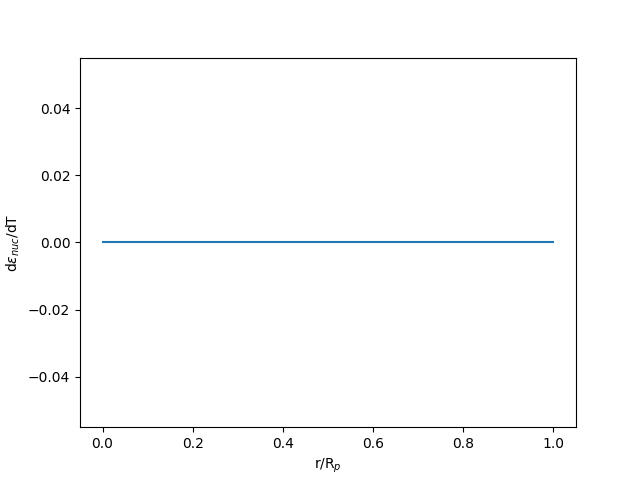

In [14]:
denuc_dT = mdl.var[end][18]

plt.figure()
plt.plot(r, denuc_dT)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'd$\epsilon_{nuc}$/dT')
#plt.yscale('log')
plt.show()

In [15]:
print(mdl.var[0][2])

[  739.0494879    739.06158031   739.08000103   739.10829702
   739.15205694   739.2200654    739.32606425   739.49138781
   739.74880539   740.14793632   740.76253514   741.69966757
   743.11014774   745.19840028   748.22805753   752.5173567
   758.4167388    766.26186178   776.30072498   788.60424108
   802.9816603    818.92811977   835.62522507   851.99913603
   866.82391423   878.84979156   889.23419983   899.90821742
   910.84532662   922.0185543    933.40080031   944.96513373
   956.68505475   968.53472145   980.48914223   992.52433555
  1004.61745928  1016.69953303  1028.66779126  1040.48755819
  1052.1469997   1063.63936283  1074.95744251  1086.09187006
  1097.03237341  1107.7718894   1118.30719024  1128.6382196
  1138.7679484   1148.70240831  1158.45007128  1168.02031814
  1177.42044796  1186.65475896  1195.72556927  1204.63448525
  1213.3842745   1221.97999751  1230.42879313  1238.73950022
  1246.92216288  1254.98706159  1262.94408736  1270.80259662
  1278.5714454   1286.2591

In [16]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Rm_over_time(i=end):

    c = 3*10**10
    eta = c**2/(4*np.pi*10**7*mdl.var[i][2]**(3/2)) #eta = c^2/(4*pi*10^7*T^3/2)
    mdl.calc_vconv('osc', i=i)
    Rm = mdl.vconv*mdl.lmix/eta
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    
    
    age = mdl.glob[i][10]
    plt.figure()
    #print(len(r),len(Rm),len(eta))
    plt.plot(r, Rm)
    plt.plot(r, 50*np.ones(len(Rm)), label=r'critical R$_m$')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'R$_m$')
    plt.yscale('log')
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=130, description='i', max=130), Output()), _dom_classes=('widget-interac…

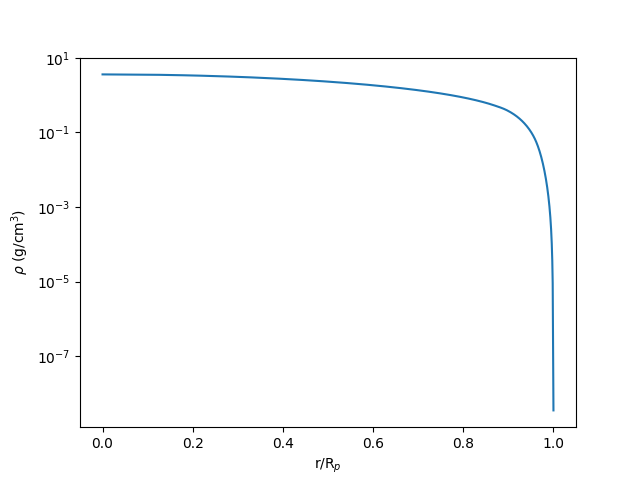

In [17]:
rho = mdl.var[end][4]

plt.figure()
plt.plot(r, rho)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'$\rho$ (g/cm$^3$)')
plt.yscale('log')
plt.show()

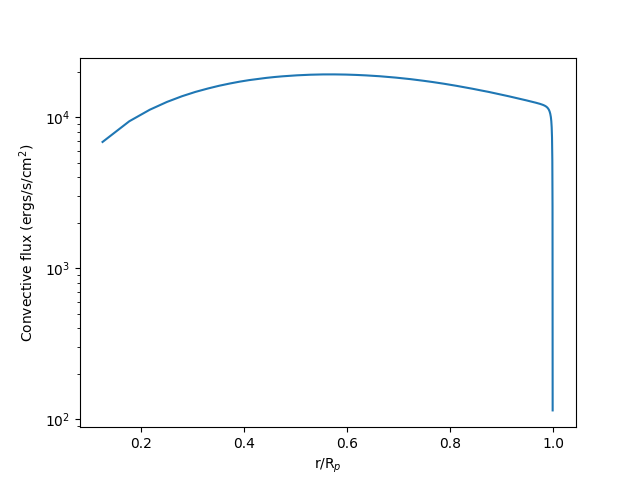

In [18]:
plt.figure()
plt.plot(r, mdl.Fconv)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Convective flux (ergs/s/cm$^2$)')
plt.yscale('log')
plt.show()

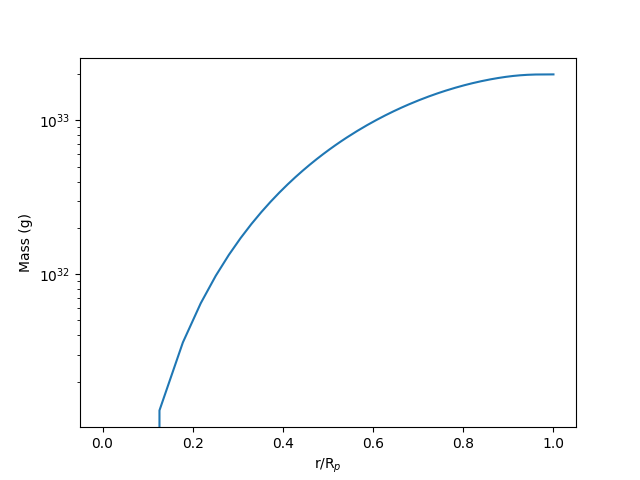

In [19]:
plt.figure()
plt.plot(r, mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

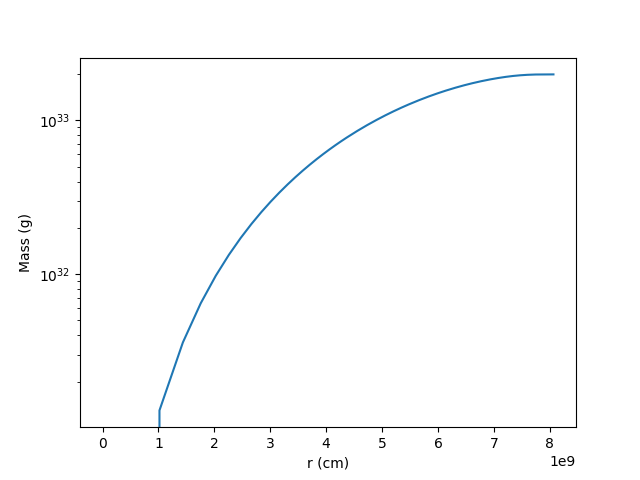

In [20]:
plt.figure()
plt.plot(mdl.var[end][0], mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r (cm)')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

In [21]:
print(R_tot)

80661287.91918999


In [22]:
R_tot = mdl.var[end][0][0]/1e2
print(R_tot)

80661287.91918999


In [130]:
#print(mdl.lmix)
#print(mdl.var[end][0][-1])
r = mdl.var[end][0]
R_tot = mdl.var[end][0][0]
index_rho = np.where(np.abs(rho - rho[-1]/2.78) < 0.05)
print(index_rho)
H_rho = r[index_rho[0][0]]
print(H_rho)
print(np.minimum(mdl.var[end][0][0], H_rho))
T = mdl.var[end][2]
index = np.where(np.abs(T - T[-1]/2.78) < 100)
H_T_obs = r[index]
H_T_obs = r[index]
print(H_T_obs)
print(mdl.var[end][0][0])

(array([393, 394, 395]),)
5778402636.976
5778402636.976
[6.83055417e+09]
8066128791.919


In [85]:
print(mdl.params.alpha)

1.642090699560724


In [111]:
mask_r = np.where((0.83/2 < r/R_tot) & (r/R_tot < 0.83))
print(mask_r)
print(len(r))
print((r/R_tot)[mask_r])

(array([372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420]),)
433
[0.82823585 0.82421009 0.82007543 0.81582805 0.81146438 0.80698177
 0.80237788 0.79764887 0.79279043 0.78780062 0.78267767 0.77741816
 0.7720185  0.76647402 0.76077909 0.75492987 0.74892434 0.74275913
 0.73642808 0.72992417 0.72324208 0.71637867 0.70933064 0.7020925
 0.69465696 0.68701512 0.67915795 0.67107885 0.66277222 0.65423098
 0.64544563 0.63640445 0.62709617 0.61751062 0.60763607 0.59745871
 0.58696349 0.576134   0.5649522  0.55339679 0.54144223 0.52906254
 0.51623182 0.5029185  0.48908379 0.4746838  0.45966817 0.44397611
 0.42753257]


In [112]:
r = mdl.var[end][0][mask_r]
R_tot = mdl.var[end][0][0]*0.83
index_rho = np.where(np.abs(rho[mask_r] - rho[mask_r][-1]/2.78) < 0.05)
print(index_rho)
H_rho = r[index_rho[0][0]]
print(H_rho)
print(np.minimum(R_tot, H_rho))
T = mdl.var[end][2][mask_r]
index = np.where(np.abs(T - T[-1]/2.78) < 100)
H_T_obs = r[index]
H_T_obs = R_tot
print(H_T_obs)
print(mdl.var[end][0][0])

(array([ 8,  9, 10, 11]),)
6394749707.025
6394749707.025
6694886897.292769
8066128791.919


In [ ]:
"""print(np.where(np.isnan(mdl.vconv)))
index_cz = np.where(np.isnan(mdl.vconv))[0][-2] + 1
print(index_cz)
print(mdl.Fconv[index_cz])"""

(array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46, 432]),)
47
114.50802957000789


In [135]:
mask_r = mask
c = 0.68
f_ohm = 1
rho_avg = np.mean(rho[mask_r])
#print(rho_avg)
#qc_0 = mdl.Fconv[mask][-1]
#qc_0 = 11316
qc_0 = mdl.Fconv[mask_r][-1]
print(qc_0)
#print(qc_0)
dr = mdl.var[end][0][mask_r]
#print(dr)
mask_2 = np.where(mdl.Fconv[mask_r] > 0)
#print(mask_2)
V = (4/3)*np.pi*(R_tot)**3
print(H_T_obs)
dF = (mdl.Fconv[mask_r][mask_2]*mdl.lmix[mask_r][mask_2]/(qc_0*H_T_obs))**(2/3)*(rho[mask_r][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
mask_3 = np.where(dF > 0)
F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
"""dF = (mdl.Fconv[mask_r][mask_2]*np.minimum(R_tot, H_rho)/(qc_0*H_T_obs))**(2/3)*(rho[mask_r][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
mask_3 = np.where(dF > 0)
F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V """
#F = np.trapz(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V #trapz ou trapezoid dépend de la version de numpy
print(F)


6848.120506444323
[6.83055417e+09]
1.0209294307082584


In [24]:
print(qc_0)

6848.120506444323


In [136]:
B = np.sqrt(c*F*rho_avg**(1/3)*qc_0**(2/3))
print(f"Generated magnetic field strength = {B} Gauss")

Generated magnetic field strength = 13.153316825242037 Gauss


In [82]:
B_time = []
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Elsasser_over_time(i=end):

    
    T = mdl.var[i][2]
    sigma = 10**7*T**(3/2)
    c_light = 3*10**10
    eta = c_light**2/(4*np.pi*sigma)
    rho = mdl.var[i][4]
    mdl.calc_vconv('osc', i=i)
    Rm = mdl.vconv*mdl.lmix/eta
    mask = np.where(~np.isnan(mdl.vconv))
    rho_avg = np.mean(rho[mask])
    qc_0 = mdl.Fconv[mask][-1]
    dr = mdl.var[i][0][mask]
    mask_2 = np.where(mdl.Fconv[mask] > 0)
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    index = np.where(np.abs(T - T[-1]/2.78) < 100)
    H_T_obs = (r[index]*R_tot)[0]
    #print(f"H_T_obs =  {H_T_obs}")

    
    V = (4/3)*np.pi*(R_tot)**3
    dF = (mdl.Fconv[mask][mask_2]*mdl.lmix[mask][mask_2]/(qc_0*H_T_obs))**(2/3)*(rho[mask][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
    mask_3 = np.where(dF > 0)
    F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
    #F= np.trapz(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V
    print(f"F = {F}")


    
    
    B = np.sqrt(c*F*rho_avg**(1/3)*qc_0**(2/3))
    B_time.append(B)
    Omega = mdl.var[i][15]
    Elsasser = B**2/(2*eta*rho*Omega)
    Elsasser_prime = Elsasser*mdl.lmix/(0.6*np.sqrt(Rm))
    
    print(f"Generated B = {B} Gauss")
    
    plt.figure()
    plt.plot(r, Elsasser, label='$\Lambda$')
    #plt.plot(r, Elsasser_prime, label='$\Lambda$ prime')
    plt.plot(r, 1*np.ones(len(Elsasser)), label=r'$\Lambda$ = 1')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'$\Lambda$ (Elsasser nb)')
    plt.yscale('log')
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=130, description='i', max=130), Output()), _dom_classes=('widget-interac…

/tmp/ipykernel_115954/2095151061.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


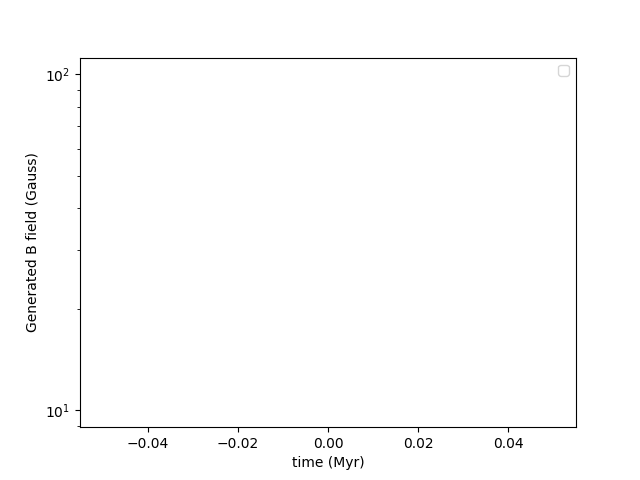

In [83]:
plt.figure()
time = np.array(mdl.glob)[:len(B_time),10]
plt.plot(time, B_time)
plt.xlabel('time (Myr)')
plt.ylabel('Generated B field (Gauss)')
plt.yscale('log')
plt.legend()
plt.show()

In [28]:
B_time

[np.float64(13.153316825242037)]